In [3]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# Exercise 1

Let us consider the sequence $U_n$ given by 
\begin{equation}\label{fib}
\left\lbrace 
\begin{array}{ll}
U_0 &= 1,\\
U_1 &= 2,\\
U_{n} &=-3U_{n-1} +U_{n-2}, \;\; \forall\; n=2,3,4\cdots
\end{array}\right. 
\end{equation}

Write a python function named  <b>SeqTerms</b> that takes as input an integer $n,\;\;n\geq 0$ and return an array of the first $n$ terms (i.e. $U_0, \cdots, U_{n-1}$) of the sequence \eqref{fib}.

In [3]:
import numpy as np
def Seq(n):
    a=1
    b=2
    if n==0:
        return 1
    if n==1:
        return 2
    for i in range(2,n+1):
        c=-3*b+a
        a=b
        b=c
    return c
Seq(2)
def SeqTerms(n):
    l=[]
    g=np.vectorize(Seq)
    for i in range(n):
        l+=[Seq(i)]
    return l
SeqTerms(4)

[1, 2, -5, 17]

# Exercise 2

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = A$$


1. Write a function named <b>Trap</b> that takes $a,b,N, f$ as inputs and return A


In [4]:
def trap(a,b,N,f):
    C=np.linspace(a,b,N+1)
    g=np.vectorize(f)
    A=g(C)
    S=0
    for i in range(1,len(A)):
        S+=A[i]+A[i-1]
    K=1/2*S*((b-a)/N)
    return K
f= lambda x: x**3+7
trap(0,1,10**6,f)

7.250000000000129

2. Write a Python code to compute and display an approximation $Aquad$ of  the integral bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$



In [5]:
from scipy.integrate import quad
a = 0
b = 2
#f = lambda x: (x**3+5*x-20)/(x**2+3)
Aquad= quad(f, a, b)[0]
print(Aquad)

-7.049316535735796


3. write a Python function <b>ErrorTrap</b> that takes $M$ as input and return an arrays $ErrorInt$ and $ListN$. Here, $ErrorInt$ contains the absolute errors between $Aquad$ and the approximation of the integral $A$ obtained using the function <b>Trap</b> for all positve intergers $N$ in $ListN$ the set of all multiples of 10 less or equal to $M$.


In [33]:
def ErrorTrap(M):
    u= lambda x: abs(quad(f,0,2)[0]-trap(0,2,x,f))
    ListN=[]
    #ErrorInt=np.zeros(M)
    for i in range(1,M+1):
        if i%10==0:
            ListN+=[i]
    g=np.vectorize(u)
    ErrorInt=g(ListN)
    return ErrorInt, ListN
ErrorTrap(30)    

(array([0.0030795, 0.0007707, 0.0003426]), [10, 20, 30])

4. Plot the output $ErrorInt$ against $ListN$ for $M=200$

In [36]:
𝐸𝑟𝑟𝑜𝑟𝐼𝑛𝑡 , 𝐿𝑖𝑠𝑡𝑁 = ErrorTrap(200)
print(𝐿𝑖𝑠𝑡𝑁)  
print(ErrorInt)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
[3.07950054e-03 7.70701307e-04 3.42601551e-04 1.92726674e-04
 1.23349010e-04 8.56605200e-05 6.29349176e-05 4.81848732e-05
 3.80721757e-05 3.08385649e-05 2.54864800e-05 2.14157629e-05
 1.82477772e-05 1.57340710e-05 1.37061368e-05 1.20464185e-05
 1.06708827e-05 9.51816892e-06 8.54262634e-06 7.70972323e-06]


# Exercise 3

1. Write code to solve the following system of ordinary differential equations using the Python function odeint.

$$
\begin{cases}
\dfrac{dx_1}{dt}& = & -\dfrac{1}{2}x_1\\\\
\dfrac{dx_2}{dt}& = & \dfrac{1}{2}x_1-\dfrac{1}{4}x_2\\\\
\dfrac{dx_3}{dt}& = & \dfrac{1}{4}x_2-\dfrac{1}{6}x_3
\end{cases}, \text{ on } [0,4]
$$

Subject to the initial conditions $x_1(0) = 1, x_2(0) = 1, x_3(0) = 1$.

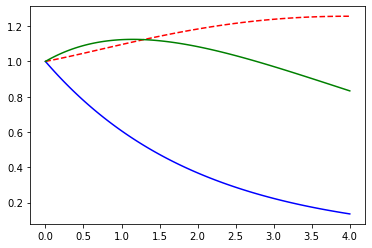

In [22]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t):
    x_1,x_2,x_3 = z
    dx_1dt = -1/2*x_1 
    dx_2dt = 1/2*x_1 -1/4*x_2
    dx_3dt = 1/4*x_2-1/6*x_3
    return dx_1dt,dx_2dt,dx_3dt

# initial condition
z0 = [1,1,1]

# time points
a = 0
b = 4
N = 100
t = np.linspace(a,b,N+1)

# solve ODE
z = odeint(model,z0,t)

x_1 = z[:,0]
x_2 = z[:,1]
x_3=z[:,2]


plt.plot(t,x_1,'b-')
plt.plot(t,x_3,'r--')
plt.plot(t,x_2,'green')


2. The exact solution of the above system of ODEs is given by

$$
\begin{cases}
x_1(t)& = & e^{-t/2}\\
x_2(t)& = & -2e^{-t/2}+3e^{-t/4}\\
x_3(t)& = & \dfrac{3}{2}e^{-t/2} - 9e^{-t/4} + \dfrac{17}{2}e^{-t/6}
\end{cases}
$$

Use $Subplot$ to plot side by side

- each exact and approximate solution in the same window
- and their absolute error vs the time 


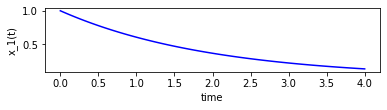

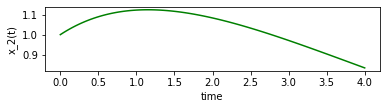

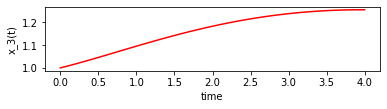

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# x_1(t)=np.exp(-t/2)
# x_2(t)=-2*np.exp(-t/2)+3*np.exp(-t/4)
# x_3(t)=3/2*np.exp(-t/2)-9*np.exp(-t/4)+17/2*np.exp(-t/6)
# #plot results
plt.subplot(3,1,1)
plt.plot(t,np.exp(-t/2),'b')
plt.xlabel('time')
plt.ylabel('x_1(t)')
plt.show()

#plot results
plt.subplot(3,1,2)
plt.plot(t,-2*np.exp(-t/2)+3*np.exp(-t/4),'g-')
plt.xlabel('time')
plt.ylabel('x_2(t)')
plt.show()

plt.subplot(3,1,3)
plt.plot(t,3/2*np.exp(-t/2)-9*np.exp(-t/4)+17/2*np.exp(-t/6),'r-')
plt.xlabel('time')
plt.ylabel('x_3(t)')
plt.show()

#plot results
# plt.subplot(3,1,3)
# plt.plot(x,y)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()


# Exercise 4

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_1<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_1,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem \eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


In [56]:
def EulerOdeSys(f,c,t):
    z_1=c[0]
    s=t[0]
    T=[s]
    Z=[z_1]
    for i in range(len(c)+1):
        z_1=z_1+(t[-1]-t[0])/len(t)*f(z_1,s)
        s=s+(t[-1]-t[0])/len(t)
        T.append(s)
        Z.append(z_1)
    return Z
f=lambda x,y: x+y
c=[0,4]
t=[0,2,4]
EulerOdeSys(f,c,t)

[0, 0.0, 1.7777777777777777, 7.703703703703703]

2. Write a python function <b> RK4OdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the fourth order Runge-Kutta method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}



In [52]:
def RK4OdeSys(f,c,t):
    k1=

2

3. Solve the system of ODEs in $Exercise2$ using your function <b> EulerOdeSys </b> and <b> RK4OdeSys </b> 

4. By plotting the absolute error in the approximate and exact solutions, tell us which function gives a more accurate solution of a system of ODEs.

# Exercise 5

Let consider us consider the function <b> primes </b> that takes $n$ as input and return a list of primes less than $n$

In [98]:
# This cell is only to import the labraries 

import numpy as np
import time

def primes(n):
    """ Returns  a list of primes < n """
    sieve = [True] * (n//2)
    for i in range(3,int(n**0.5)+1,2):
        if sieve[i//2]:
            sieve[i*i//2::i] = [False] * ((n-i*i-1)//(2*i)+1)
    return [2] + [2*i+1 for i in range(1,n//2) if sieve[i]]
primes(30)


[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

For any integer $n>0$ and a prime number $p$, define $\nu_p(n)$ as the greatest integer $r$ such that $p^r$ divides $n$.
Define $$ D(n,m) = \sum_{p\; prime} \Bigl| \nu_p(n) - \nu_p(m)\Bigr| $$

For example $D(14,24)=4$.

Furthermore, define

$$S(N)  = \sum_{n=1}^{N}\sum_{m=1}^{N}D(n,m).$$

You are given $S(10)=210$.

1. Write an efficient python function, <b>Func_S </b>, that takes $N$ as input and return the value $S(N)$.


In [101]:
def val(n,p):
    L=[]
    for i in range(n):
        if n%(p**i)==0:
            L+=[i]
    return L[-1] 
 
def dump(n,m):
    list_prime=primes(100)
    S=0
    for i in list_prime:
        S+=abs(val(n,i)-val(m,i))
    return S

def Func_S(N):
    s=0
    for i in range(1,N+1):
        for j in range(1,N+1):
            s=s+dump(i,j)
    return s
Func_S(10)


210

2. Compute $S(10)$ and display its computational time

In [103]:
N = 10
time_start = time.perf_counter()
S = Func_S(N)
time_elapsed = (time.perf_counter() - time_start)
print('S({}) =  {}'.format(N,S))
print('computational Time = ', time_elapsed)

S(10) =  210
computational Time =  0.01053150900406763


3. Compute $S(100)$ and display its computational time

In [104]:
N = 100
time_start = time.perf_counter()
S = Func_S(N)
time_elapsed = (time.perf_counter() - time_start)
print('S({}) =  {}'.format(N,S))
print('computational Time = ', time_elapsed)

S(100) =  37018
computational Time =  8.480332631006604


4. Compute $S(1000)$ and display its computational time

In [ ]:
N = 1000
time_start = time.perf_counter()
S = Func_S(N)
time_elapsed = (time.perf_counter() - time_start)
print('S({}) =  {}'.format(N,S))
print('computational Time = ', time_elapsed)

5. Compute $S(10000)$ and display its computational time

6. Compute $S(100000)$ and display its computational time

7. Compute $S(1000000)$ and display its computational time

# Exercise 6 
1. Import the necessary libraries and read the chipio and assign it to a variable called chipo (this dataset is available at the course website)

In [73]:
import pandas as pd
import numpy as np
chipo=pd.read_csv('chipo.tsv',sep='\t',header=0)
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


2. Show the first 10 entries


In [75]:
chipo.iloc[0:10]
chipo[:10]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


3. How many observations in the dataset?

In [25]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


4. How many columns in the dataset?

In [1]:
col=chipo.shape[0]
print('the dataset have\t',col,"columns")

NameError: name 'chipo' is not defined

5. Print the names of all the columns

In [93]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description', 'item_price',
       'revenue'],
      dtype='object')

In [57]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


6. How much was the revenue for the period in the dataset?

In [95]:
kk=chipo.groupby('item_price').sum()
kk
chipo[['item_price','quantity']][:6]
chipo['revenue']=chipo['quantity']*chipo["item_price"]
chipo

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,$2.39
1,1,1,Izze,[Clementine],$3.39,$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,$16.98 $16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,$8.75


7. How many unique items were sold?

In [54]:
s=np.unique(chipo.item_name)
len(s)

50

8. How many orders were made in the period?

In [86]:
for i in chipo[['item_price','quantity']][0:]:
    print(i)

item_price
quantity


9. How many missing values in the dataframe?

In [87]:
chipo[['item_price','quantity']][0:1]

,item_price,quantity
0,$2.39,1
